# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from  sklearn  import  set_config
set_config(display='diagram')

# Custom functions

In [3]:
def save_dataset(nome_file, file):
    with open(nome_file +'.pkl', 'wb') as f:
        pickle.dump(file, f)
    return

In [4]:
def dataset_parameters(df,target):
    df_features = df.drop([target], axis=1)
    data_type_numerical = ['int64', 'float64']
    data_type_object = ['object', 'bool', 'category']
    data_type_date = ['datetime64']
    categorical_features  = list(filter(lambda x: df_features[x].dtype in data_type_object, df_features.columns))
    numerical_features = list(filter(lambda x: df_features[x].dtype in data_type_numerical, df_features.columns))
    date_features = list(filter(lambda x: df_features[x].dtype in data_type_date, df_features.columns))
    all_features  = numerical_features  + categorical_features + date_features 
    return categorical_features, numerical_features, date_features, all_features,target  

In [5]:
def numeric_summary_parameters(df, column_names):
    result = {}
    for col in column_names:
        min_value = df[col].min()
        max_value = df[col].max()
        mean_value = df[col].mean()
        result[col] = [min_value, max_value, mean_value]
    return result

In [6]:
def dataframe_with_null(df):
    percentuale = round(df[df.isnull().any(axis=1)].shape[0]/df.shape[0]*100, 2)
    print('The dataset has {}% of records with at least one NaN value'.format(percentuale))

In [7]:
def unique_values_dataframe(df, categorical_features):
    result = {}
    for col in categorical_features:
        unique_values = df[col].unique()
        result[col] = unique_values.tolist()        
    unique_df = pd.DataFrame.from_dict(result, orient='index')
    unique_df = unique_df.transpose()
    return unique_df   

# Import dataset and visualize properties

In [8]:
df = pd.read_csv('diamonds.csv')

In [9]:
df.sample(10, random_state=13)

,carat,cut,color,clarity,depth,table,x,y,z,price
11622,1.20,Ideal,I,SI2,60.5,58.0,6.92,6.83,4.16,5050.0
53686,0.80,Very Good,E,SI2,62.9,54.0,5.91,6.02,3.75,2715.0
6479,1.02,Premium,F,SI2,61.1,62.0,6.54,6.49,3.98,4057.0
40391,0.53,Ideal,G,SI2,59.9,57.0,5.25,5.30,3.16,1132.0
37663,0.42,Premium,F,SI1,61.8,58.0,4.84,4.81,2.98,992.0
16749,1.04,Very Good,G,VS1,63.1,57.0,6.39,6.44,4.05,6669.0
34750,0.41,Premium,H,SI1,62.0,59.0,4.80,4.78,2.97,876.0
37915,0.41,Ideal,F,VS1,61.9,57.0,4.73,4.77,2.94,1007.0
13687,1.01,Premium,E,SI1,62.9,58.0,6.41,6.35,4.01,5599.0
668,0.77,Premium,E,SI1,62.9,59.0,5.84,5.79,3.66,2846.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   x        53940 non-null  float64
 7   y        53940 non-null  float64
 8   z        53940 non-null  float64
 9   price    53940 non-null  float64
dtypes: float64(7), object(3)
memory usage: 4.1+ MB


# Remove unnecessary records

In [11]:
categorical_features, numerical_features, date_features, all_features, target = dataset_parameters(df,'price')

In [12]:
dataframe_with_null(df)

The dataset has 0.0% of records with at least one NaN value


In [13]:
df[df.isnull().any(axis=1)]

,carat,cut,color,clarity,depth,table,x,y,z,price


In [14]:
# df = df.dropna()

In [15]:
unique_values_dataframe(df, categorical_features).fillna('')

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,I,SI1
2,Good,J,VS1
3,Very Good,H,VS2
4,Fair,F,VVS2
5,,G,VVS1
6,,D,I1
7,,,IF


In [16]:
df.describe()

,carat,depth,table,x,y,z,price
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,5.731157,5.734526,3.538734,3932.799722
std,0.474011,1.432621,2.234491,1.121761,1.142135,0.705699,3989.439738
min,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,950.000000
50%,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000,2401.000000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000,5324.250000
max,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000,18823.000000


# Save DataFrame

In [17]:
save_dataset('diamonds_df', df)

# Visualize the relationship among numerical features

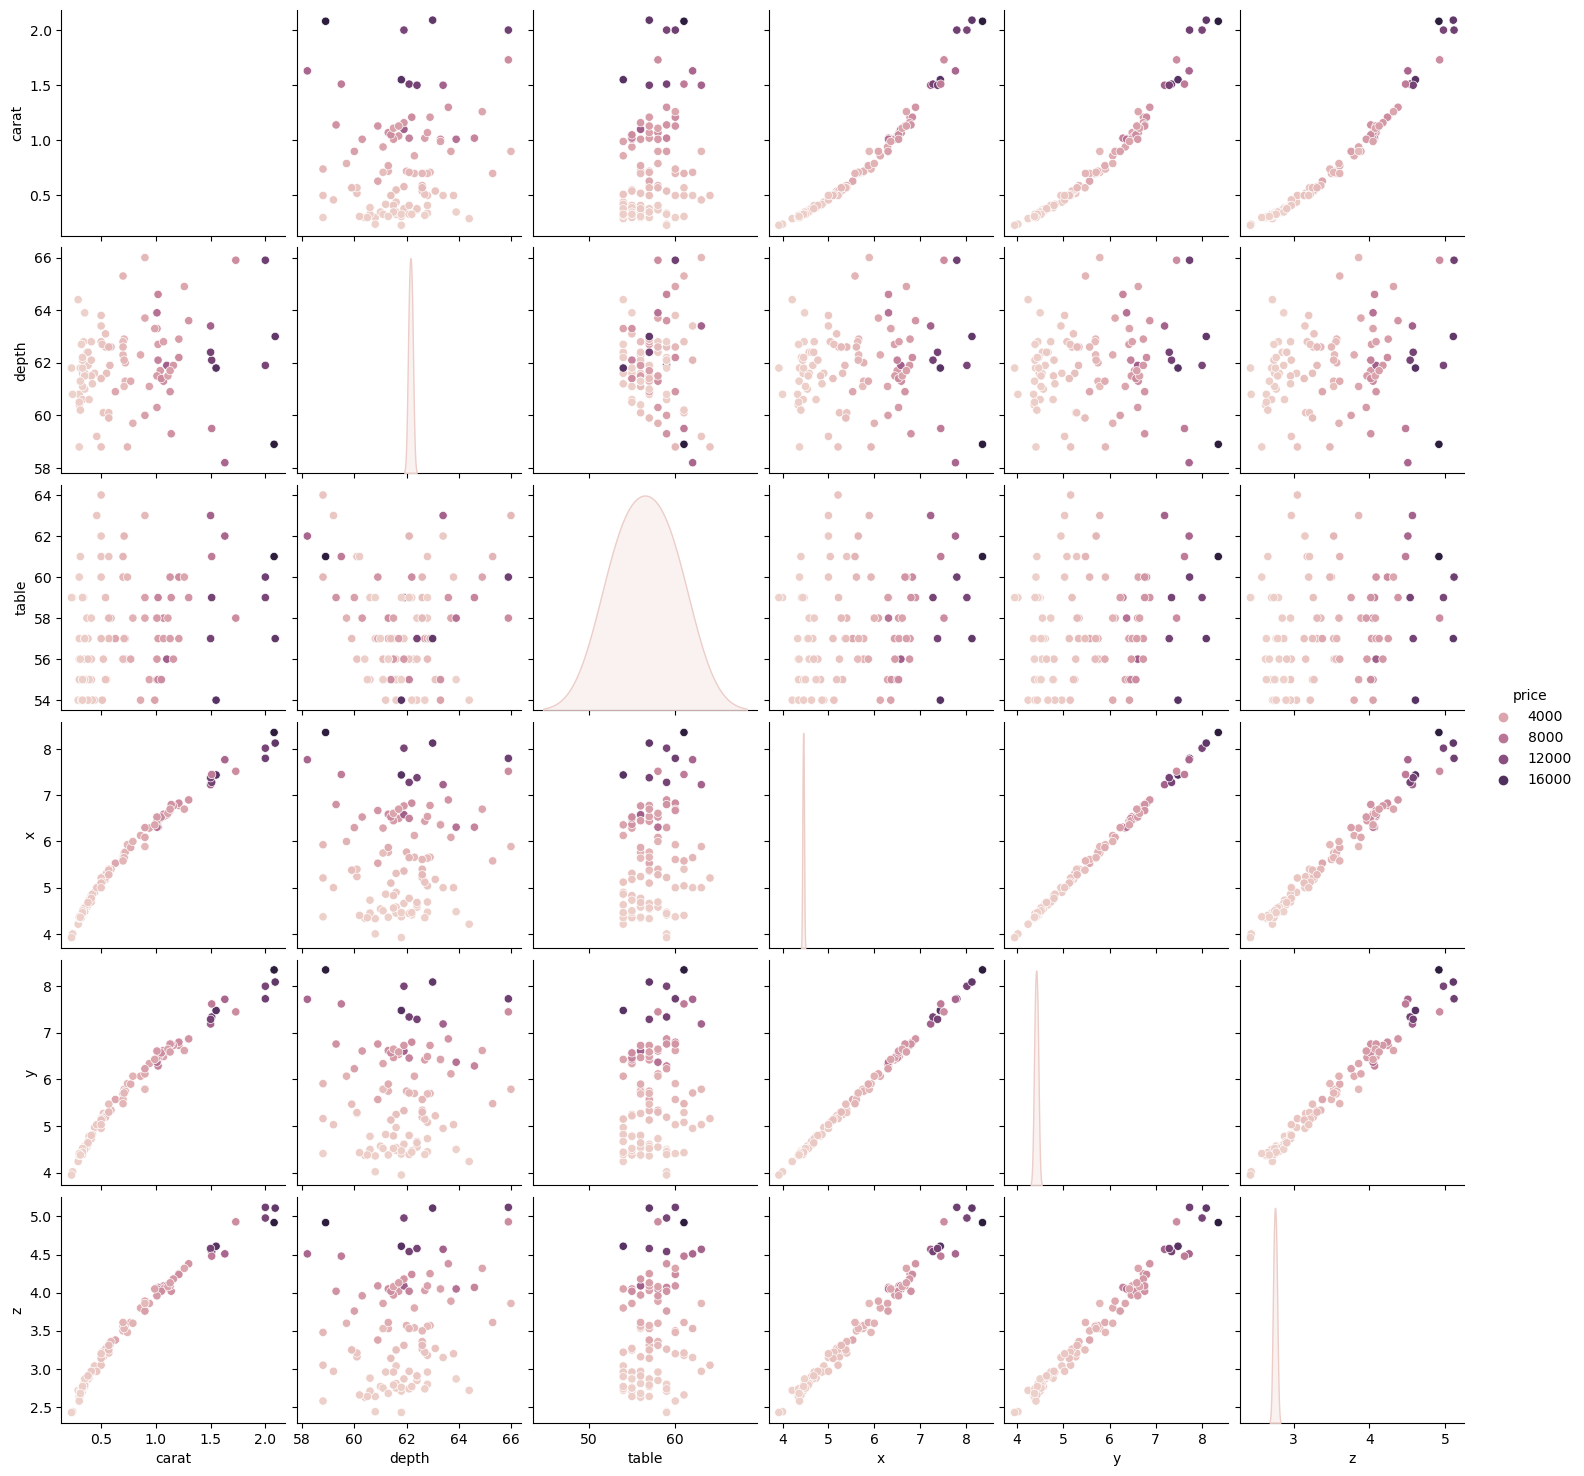

In [18]:
plt.plot
sns.pairplot(df.sample(100), hue="price")

# Transform  categorical and numerical  features

In [19]:
transformers = [    
    ('one', OneHotEncoder(), categorical_features),
    ('scale', StandardScaler(), numerical_features)
]

In [20]:
ct = ColumnTransformer(transformers)

In [21]:
ct

ColumnTransformer(transformers=[('one', OneHotEncoder(),
                                 ['cut', 'color', 'clarity']),
                                ('scale', StandardScaler(),
                                 ['carat', 'depth', 'table', 'x', 'y', 'z'])])

In [22]:
df_transformed = ct.fit_transform(df)

# Save X and y dataset

In [23]:
dataset_X_y = df_transformed, df[target].values

In [24]:
save_dataset('diamonds_dataset', dataset_X_y)

In [25]:
dataset_X_y

(array([[ 0.        ,  0.        ,  1.        , ..., -1.58783745,
         -1.53619556, -1.57112919],
        [ 0.        ,  0.        ,  0.        , ..., -1.64132529,
         -1.65877419, -1.74117497],
        [ 0.        ,  1.        ,  0.        , ..., -1.49869105,
         -1.45739502, -1.74117497],
        ...,
        [ 0.        ,  0.        ,  0.        , ..., -0.06343409,
         -0.04774083,  0.03013526],
        [ 0.        ,  0.        ,  0.        , ...,  0.37338325,
          0.33750627,  0.28520393],
        [ 0.        ,  0.        ,  1.        , ...,  0.08811478,
          0.11861587,  0.14349912]]),
 array([ 326.,  326.,  327., ..., 2757., 2757., 2757.]))

# Save processed DataFrame

In [26]:
df_processed = pd.DataFrame(df_transformed , columns=ct.get_feature_names_out())

In [27]:
df_processed.columns = [col.split('__')[1] for col in df_processed.columns]

In [28]:
df_processed = pd.concat([df_processed, df[target]], axis=1)

In [29]:
save_dataset('diamonds_df_processed', df_processed)

In [30]:
df_processed.sample(10)

,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,...,clarity_VS2,clarity_VVS1,clarity_VVS2,carat,depth,table,x,y,z,price
10041,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,-1.134878,0.105120,-0.652139,-1.480862,-1.431128,-1.429424,418.0
33669,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,-0.881717,0.174922,-1.099672,-0.963813,-0.932058,-0.919287,836.0
2653,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,-0.185524,-0.243894,-0.652139,0.007883,0.048571,0.001794,3234.0
53050,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,-0.164427,0.663542,0.690462,0.016798,-0.021474,0.072647,2607.0
37619,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,-1.177071,0.942753,-1.099672,-1.578923,-1.518684,-1.457765,485.0
6034,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,-1.008297,0.314528,-1.994739,-1.168849,-1.124682,-1.103503,575.0
51310,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,-1.029394,1.291767,-1.099672,-1.284740,-1.238505,-1.131844,544.0
31329,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,-1.029394,0.105120,-0.652139,-1.257996,-1.194727,-1.202697,759.0
31348,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,-0.797330,0.244725,-1.547205,-0.812264,-0.783213,-0.763412,760.0
11510,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.447378,1.361569,1.137995,0.489274,0.512619,0.667807,5021.0
